## ベクトル・行列計算

### ベクトルの計算

In [1]:
a = [1, 2, 3]
2 * a

3-element Vector{Int64}:
 2
 4
 6

In [2]:
b = [4, 5, 6]
a + b

3-element Vector{Int64}:
 5
 7
 9

In [3]:
a .* b

3-element Vector{Int64}:
  4
 10
 18

In [4]:
sum(a .* b)

32

In [5]:
a' * b

32

### 行列の計算

In [6]:
A = [1 2 3;
     4 5 6]
B = [10 20 30;
     40 50 60]
A + B

2×3 Matrix{Int64}:
 11  22  33
 44  55  66

In [7]:
A = [1 2;
     3 4;
     5 6]
B = [10 20 30 40;
     50 60 70 80]
C = A * B

3×4 Matrix{Int64}:
 110  140  170  200
 230  300  370  440
 350  460  570  680

In [8]:
M = size(A, 1) # Aの行数
N = size(B, 2) # Bの列数

# M × Nの行列を作成
C = [sum(A[i, :] .* B[:, j]) for i in 1:M, j in 1:N]

3×4 Matrix{Int64}:
 110  140  170  200
 230  300  370  440
 350  460  570  680

In [9]:
B * A

LoadError: DimensionMismatch("matrix A has dimensions (2,4), matrix B has dimensions (3,2)")

In [10]:
A = [1 2;
     3 4;
     5 6]
I = [1 0 0;
     0 1 0;
     0 0 1]
I * A

3×2 Matrix{Int64}:
 1  2
 3  4
 5  6

In [11]:
A = [1 2 3;
     4 5 6]
A'

3×2 adjoint(::Matrix{Int64}) with eltype Int64:
 1  4
 2  5
 3  6

In [12]:
a = [1, 2, 3]
b = [5, 7]
a * b'

3×2 Matrix{Int64}:
  5   7
 10  14
 15  21

In [13]:
f2(x, y) = 2x + y
f2.(a, b')

3×2 Matrix{Int64}:
  7   9
  9  11
 11  13

In [14]:
A = [1 2;
     3 4]
B = inv(A)

2×2 Matrix{Float64}:
 -2.0   1.0
  1.5  -0.5

In [15]:
A * B

2×2 Matrix{Float64}:
 1.0          0.0
 8.88178e-16  1.0

In [16]:
B * A

2×2 Matrix{Float64}:
 1.0          0.0
 2.22045e-16  1.0

In [17]:
println(B)

[-1.9999999999999996 0.9999999999999998; 1.4999999999999998 -0.4999999999999999]


In [18]:
A = Rational{Int}[1 2;
                  3 4]
B = inv(A)
println(A * B)
println(B * A)

Rational{Int64}[1//1 0//1; 0//1 1//1]
Rational{Int64}[1//1 0//1; 0//1 1//1]


In [19]:
A = Rational{Int}[1 2;
                  3 4]
sol = inv(A) * [-1, 1]

2-element Vector{Rational{Int64}}:
  3//1
 -2//1

## 統計量の計算

In [20]:
using Statistics

In [21]:
X = rand(5)

5-element Vector{Float64}:
 0.14227488450157333
 0.8820739833381868
 0.9358494812192025
 0.19703348596623504
 0.16042272098393418

In [22]:
Y = rand(2, 5)

2×5 Matrix{Float64}:
 0.387401  0.0116855  0.707475  0.0842409  0.27368
 0.645624  0.327805   0.151678  0.355179   0.51111

### 合計，平均

In [23]:
println(sum(X))
println(mean(X))

2.317654556009132
0.46353091120182643


In [24]:
println(sum(Y))
println(sum(Y, dims=1))
println(sum(Y, dims=2))
println(mean(Y))
println(mean(Y, dims=1))
println(mean(Y, dims=2))

3.4558780004817997
[1.033025202201469 0.3394902168081365 0.8591532627527653 0.4394197491191172 0.7847895696003117]
[1.4644833042430054; 1.9913946962387943;;]
0.34558780004817996
[0.5165126011007345 0.16974510840406826 0.42957663137638263 0.2197098745595586 0.3923947848001558]
[0.2928966608486011; 0.39827893924775887;;]


### 分散，標準偏差

In [25]:
println(std(X))
println(std(X)^2)
println(var(X))

0.4075426425977412
0.16609100553555023
0.16609100553555023


### 共分散

In [26]:
cov(Y, dims=1)

5×5 Matrix{Float64}:
  0.0333394   0.0408145  -0.0717597   0.0349811   0.0306548
  0.0408145   0.0499657  -0.0878492   0.0428244   0.037528
 -0.0717597  -0.0878492   0.154456   -0.0752934  -0.0659814
  0.0349811   0.0428244  -0.0752934   0.0367037   0.0321643
  0.0306548   0.037528   -0.0659814   0.0321643   0.0281864

In [27]:
cov(Y, dims=2)

2×2 Matrix{Float64}:
  0.0759482  -0.0130543
 -0.0130543   0.0353866

## 統計量と確率分布のパラメータ

In [30]:
using Pkg
Pkg.add("Distributions")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed IrrationalConstants ─ v0.1.1
   Installed PDMats ────────────── v0.11.5
   Installed DataAPI ───────────── v1.9.0
   Installed Rmath ─────────────── v0.7.0
   Installed StatsFuns ─────────── v0.9.15
   Installed OrderedCollections ── v1.4.1
   Installed SpecialFunctions ──── v2.1.2
   Installed ChainRulesCore ────── v1.12.0
   Installed QuadGK ────────────── v2.4.2
   Installed Distributions ─────── v0.25.48
   Installed Rmath_jll ─────────── v0.3.0+0
   Installed FillArrays ────────── v0.12.8
   Installed DataStructures ────── v0.18.11
   Installed StatsAPI ──────────── v1.2.1
   Installed LogExpFunctions ───── v0.3.6
   Installed OpenSpecFun_jll ───── v0.5.5+0
   Installed Compat ────────────── v3.41.0
   Installed SortingAlgorithms ─── v1.0.1
   Installed InverseFunctions ──── v0.1.2
   Installed ChangesOfVariables ── v0.1.2
   Installed Missings ──────────── v1.0.2
   Installed

In [31]:
using Distributions
μ = 1.5
σ = 2.0
Z = rand(Normal(μ, σ), 10000)
Z

10000-element Vector{Float64}:
  1.0722083704949783
  1.436767311153771
  1.741694318801256
  1.6532092059354455
  0.571230442124638
  2.1737708910279663
  0.6263929672194247
  0.04272273014242112
  2.9543467457117716
  0.10216600719460178
  0.7578978004437255
  2.5525087433536218
 -0.5371801347070648
  ⋮
  2.6119389892671547
 -0.8453175179135028
  1.907160328043443
  2.0269559313693786
 -0.9254685695033542
  1.9599955489569922
  2.8435969828702357
  1.647224227857397
  2.27915766356389
  4.6148262262678035
  5.801663279233031
 -2.255801050242433

In [32]:
println(mean(Z))
println(std(Z))

1.4983104343057514
1.9926190299118207


## 微分計算

### 1変数関数の微分

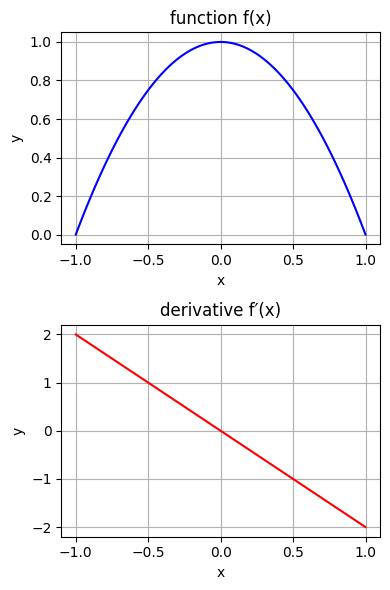

In [36]:
using PyPlot

# f(x)を２次関数として定義
f(x) = -(x + 1)*(x - 1)

# hを微小な値として設定(10のマイナス10乗)
h = 1.0e-10

# 導関数f′の近似式
f′(a) = (f(a + h) - f(a)) / h

# 関数の可視化範囲
xs = range(-1, 1, length=100)

fig, axes = subplots(2, 1, figsize=(4, 6))

# 関数のプロット
axes[1].plot(xs, f.(xs), "b")
axes[1].grid()
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].set_title("function f(x)")

# 導関数のプロット
axes[2].plot(xs, f′.(xs), "r")
axes[2].grid()
axes[2].set_xlabel("x"), axes[2].set_ylabel("y")
axes[2].set_title("derivative f′(x)")

tight_layout()

### 多変数関数の微分

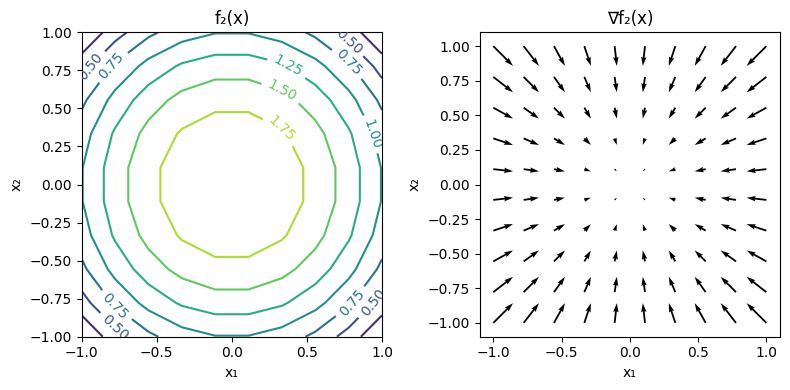

In [ ]:
# グラフを可視化する際の解像度
L = 10

# f₂(x)を可視化する範囲
xs₁ = range(-1, 1, length=L)
xs₂ = range(-1, 1, length=L)

# 2変数関数の定義
f₂(x) = -(x .+ 1)' * (x .- 1)

# ２変数関数の勾配
∇f₂(x) = -2x

fig, axes = subplots(1, 2, figsize=(8, 4))

# 関数の等高線図の可視化
cs = axes[1].contour(xs₁, xs₂, [f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')
axes[1].clabel(cs, inline=true)
axes[1].set_xlabel("x₁"), axes[1].set_ylabel("x₂")
axes[1].set_title("f₂(x)")

# 勾配ベクトルの計算と可視化
vec1 = [∇f₂([x₁, x₂])[1] for x₁ in xs₁, x₂ in xs₂]
vec2 = [∇f₂([x₁, x₂])[2] for x₁ in xs₁, x₂ in xs₂]
axes[2].quiver(repeat(xs₁, 1, L), repeat(xs₂', 1, L), vec1, vec2)
axes[2].set_xlabel("x₁"), axes[2].set_ylabel("x₂")
axes[2].set_title("∇f₂(x)")

tight_layout()

### 自動微分

In [44]:
Pkg.add("ForwardDiff")

   Resolving package versions...
   Installed DiffRules ──────────── v1.10.0
   Installed NaNMath ────────────── v0.3.7
   Installed DiffResults ────────── v1.0.3
   Installed CommonSubexpressions ─ v0.3.0
   Installed ForwardDiff ────────── v0.10.25
   Installed StaticArrays ───────── v1.3.5
    Updating `~/.julia/environments/v1.7/Project.toml`
  [f6369f11] + ForwardDiff v0.10.25
    Updating `~/.julia/environments/v1.7/Manifest.toml`
  [bbf7d656] + CommonSubexpressions v0.3.0
  [163ba53b] + DiffResults v1.0.3
  [b552c78f] + DiffRules v1.10.0
  [f6369f11] + ForwardDiff v0.10.25
  [77ba4419] + NaNMath v0.3.7
  [90137ffa] + StaticArrays v1.3.5
Precompiling project...
  ✓ NaNMath
  ✓ CommonSubexpressions
  ✓ DiffRules
  ✓ StaticArrays
  ✓ DiffResults
  ✓ ForwardDiff
  6 dependencies successfully precompiled in 6 seconds (51 already precompiled)


In [45]:
using ForwardDiff

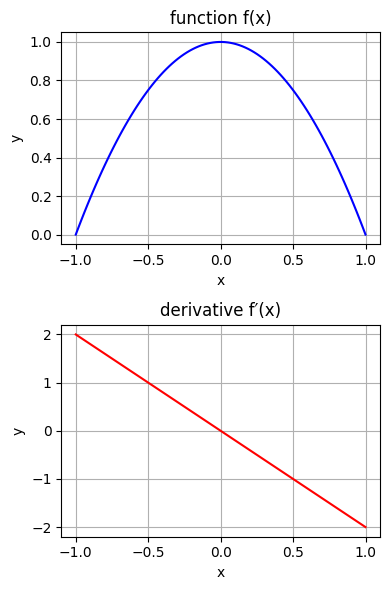

In [46]:
# 2次関数を定義
f(x) = -(x + 1) * (x - 1)

# 自動微分によって導関数f′(x)を求める
f′(x) = ForwardDiff.derivative(f, x)

# 関数の可視化範囲
xs = range(-1, 1, length=100)

fig, axes = subplots(2, 1, figsize=(4, 6))

# 関数のプロット
axes[1].plot(xs, f.(xs), "b")
axes[1].grid()
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].set_title("function f(x)")

# 導関数のプロット
axes[2].plot(xs, f′.(xs), "r")
axes[2].grid()
axes[2].set_xlabel("x"), axes[2].set_ylabel("y")
axes[2].set_title("derivative f′(x)")

tight_layout()

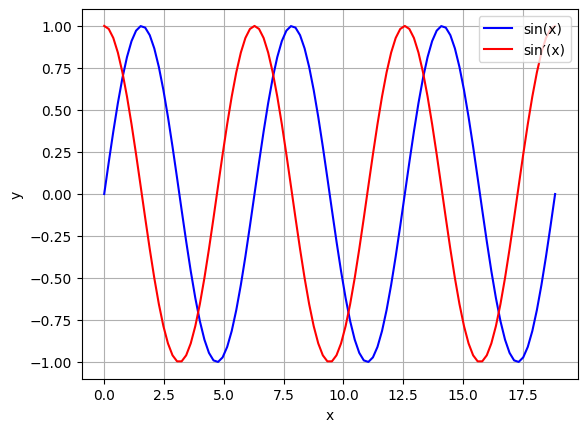

PyObject <matplotlib.legend.Legend object at 0xffff53bc54f0>

In [49]:
fig, ax = subplots()
xs = range(0, 2pi * 3, length=100)

# sin(x)をプロット
ax.plot(xs, sin.(xs), color="b", label="sin(x)")

# 導関数をプロット
ax.plot(xs, map(x -> ForwardDiff.derivative(sin, x), xs), color="r", label="sin′(x)")
ax.grid()
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.legend()

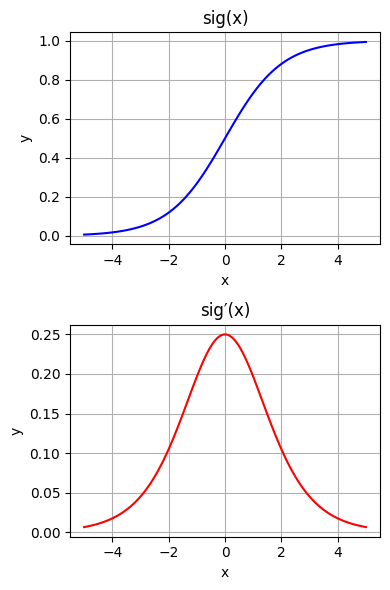

In [51]:
# シグモイド関数を定義
sig(x) = 1 / (1 + exp(-x))

xs = range(-5, 5, length=100)
fig, axes = subplots(2, 1, figsize=(4, 6))

# シグモイド関数をプロット
axes[1].plot(xs, sig.(xs), color="b")
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].set_title("sig(x)")
axes[1].grid()

# 導関数をプロット
axes[2].plot(xs, map(x -> ForwardDiff.derivative(sig, x), xs), color="r")
axes[2].set_xlabel("x"), axes[2].set_ylabel("y")
axes[2].set_title("sig′(x)")
axes[2].grid()

tight_layout()

## 関数の最適化

### １変数関数の勾配法

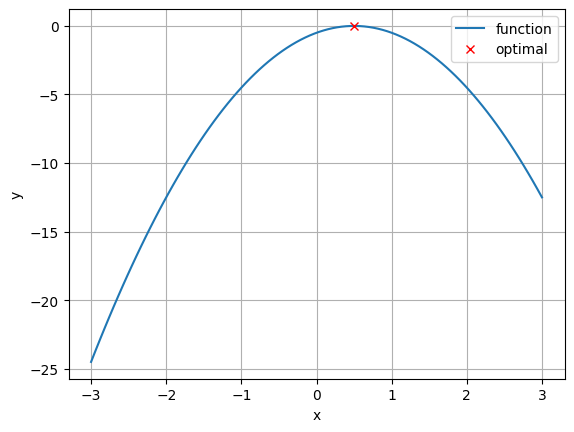

PyObject <matplotlib.legend.Legend object at 0xffff4cce6730>

In [52]:
# 最大値を探したい目的関数
x_opt = 0.50
f(x) = -2(x - x_opt)^2

fig, ax = subplots()
xs = range(-3, 3, length=100)
ax.plot(xs, f.(xs), label="function")
ax.plot(x_opt, f(x_opt), "rx", label="optimal")
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.grid()
ax.legend()

In [53]:
# 1変数関数の最適化
function gradient_method_1dim(f, x_init, η, maxiter)
    # 最適化過程のパラメータを格納する配列
    x_seq = Array{typeof(x_init)}(undef, maxiter)
    
    # 勾配
    f′(x) = ForwardDiff.derivative(f, x)
    
    # 初期値
    x_seq[1] = x_init
    
    # メインの最適化ループ
    for i in 2:maxiter
        x_seq[i] = x_seq[i-1] + η * f′(x_seq[i-1])
    end
    
    x_seq
end

gradient_method_1dim (generic function with 1 method)

In [54]:
# 探索の初期値
x_init = -2.5

# 探索の繰り返し数
maxiter = 20

# ステップサイズ
η = 0.1

# 最適化計算を実行
x_seq = gradient_method_1dim(f, x_init, η, maxiter)
f_seq = f.(x_seq)

20-element Vector{Float64}:
 -18.0
  -6.479999999999999
  -2.3327999999999993
  -0.8398079999999998
  -0.30233087999999986
  -0.10883911679999994
  -0.03918208204799999
  -0.014105549537279988
  -0.0050779978334207915
  -0.0018280792200314835
  -0.0006581085192113332
  -0.0002369190669160795
  -8.529086408978862e-5
  -3.07047110723239e-5
  -1.1053695986036396e-5
  -3.979330554973165e-6
  -1.4325589997903394e-6
  -5.157212399245448e-7
  -1.8565964637284966e-7
  -6.683747269421776e-8

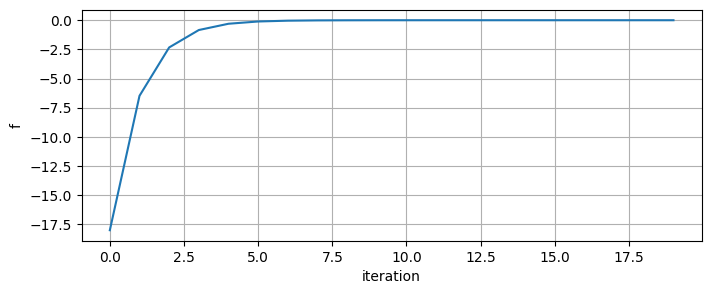

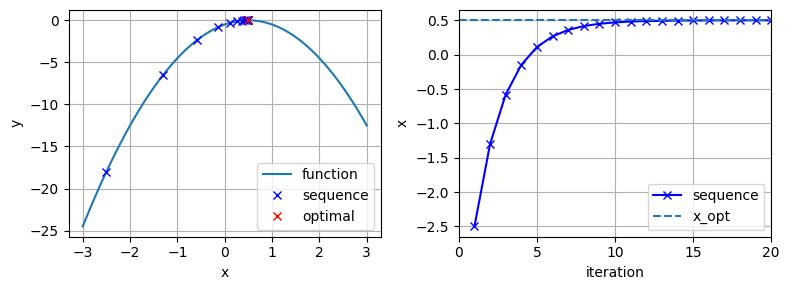

In [55]:
# 目的関数の値をステップごとにプロット
fig, ax = subplots(figsize=(8, 3))
ax.plot(f_seq)
ax.set_xlabel("iteration"), ax.set_ylabel("f")
ax.grid()

fig, axes = subplots(1, 2, figsize=(8, 3))

# 関数のプロット
axes[1].plot(xs, f.(xs), label="function")

# 探索の過程
axes[1].plot(x_seq, f_seq, "bx", label="sequence")

# 最適値
axes[1].plot(x_opt, f(x_opt), "rx", label="optimal")
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].grid()
axes[1].legend()

# 探索の過程をステップごとにプロット
axes[2].plot(1:maxiter, x_seq, "bx-", label="sequence")
axes[2].hlines(x_opt, 0, maxiter, ls="--", label="x_opt")
axes[2].set_xlim([0, maxiter])
axes[2].set_xlabel("iteration"), axes[2].set_ylabel("x")
axes[2].grid()
axes[2].legend()

tight_layout()

### 多変数関数の勾配法

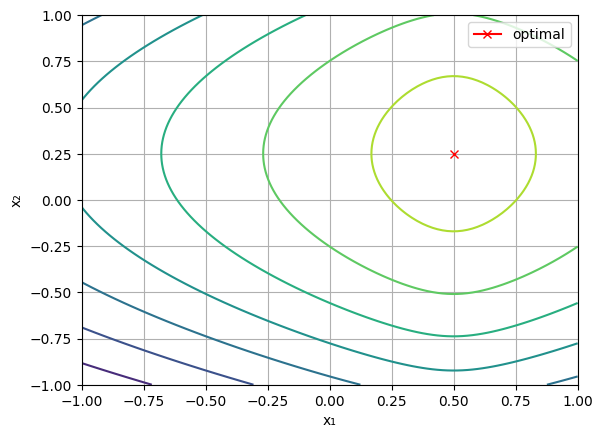

PyObject <matplotlib.legend.Legend object at 0xffff53957820>

In [57]:
# 2変数関数を定義
x_opt = [0.50, 0.25]
f₂(x) = -sqrt(0.05 + (x[1] - x_opt[1])^2) - (x[2] - x_opt[2])^2

# 関数を等高線図として可視化
L = 100
xs₁ = range(-1, 1, length=L)
xs₂ = range(-1, 1, length=L)
fig, ax = subplots()
ax.contour(xs₁, xs₂, [f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')
ax.plot(x_opt[1], x_opt[2], color="r", marker="x", label="optimal")
ax.set_xlabel("x₁"), ax.set_ylabel("x₂")
ax.grid()
ax.legend()

In [76]:
# 多変数関数のための勾配法
function gradient_method(f, x_init, η, maxiter)
    # 最適化過程のパラメータを格納する配列
    x_seq = Array{typeof(x_init[1]), 2}(undef, length(x_init), maxiter)
    
    # 勾配
    ∇f(x) = ForwardDiff.gradient(f, x)
    
    # 初期化
    x_seq[:, 1] = x_init
    
    # メインの最適化ループ
    for i in 2:maxiter
        x_seq[:, i] = x_seq[:, i-1] + η * ∇f(x_seq[:, i-1])
    end
    
    x_seq
end

# パラメータの設定
x_init = [-0.75, -0.75]
maxiter = 20
η = 0.1

# 最適化の実行
x_seq = gradient_method(f₂, x_init, η, maxiter)
f_seq = [f₂(x_seq[:, i]) for i in 1:maxiter]

20-element Vector{Float64}:
 -2.2698425099200294
 -1.8130713587869223
 -1.4864674129221398
 -1.2435333058718216
 -1.0546304357566991
 -0.9009647514196972
 -0.7707699828580662
 -0.6569195690940037
 -0.5554903555124693
 -0.46498971917861137
 -0.3860446444970153
 -0.3212180328272999
 -0.27400717006417613
 -0.2457105046976077
 -0.23231600743801767
 -0.22703677774417294
 -0.22508176283129977
 -0.22432371767829845
 -0.2239955619536749
 -0.2238341324318122

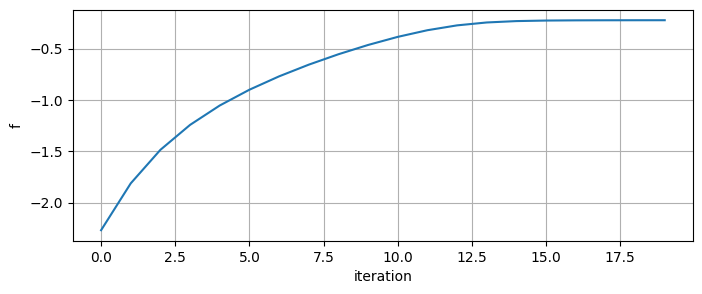

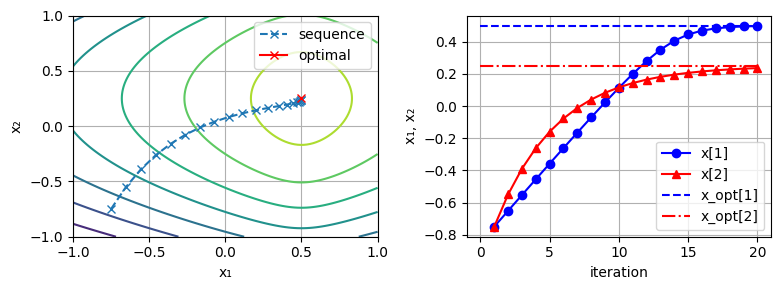

In [78]:
# 目的関数の値をステップごとにプロット
fig, ax = subplots(figsize=(8, 3))
ax.plot(f_seq)
ax.set_xlabel("iteration"), ax.set_ylabel("f")
ax.grid()

fig, axes = subplots(1, 2, figsize=(8, 3))

# 等高線図で関数を可視化
axes[1].contour(xs₁, xs₂, [f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')

# 最適化の過程
axes[1].plot(x_seq[1, :], x_seq[2, :], ls="--", marker="x", label="sequence")
axes[1].plot(x_opt[1], x_opt[2], color="r", marker="x", label="optimal")
axes[1].set_xlabel("x₁"), axes[1].set_ylabel("x₂")
axes[1].grid()
axes[1].legend()

# ステップごとの最適化の過程
axes[2].plot(1:maxiter, x_seq[1, :], color="b", marker="o", label="x[1]")
axes[2].plot(1:maxiter, x_seq[2, :], color="r", marker="^", label="x[2]")
axes[2].hlines(x_opt[1], 0, maxiter, color="b", ls="--", label="x_opt[1]")
axes[2].hlines(x_opt[2], 0, maxiter, color="r", ls="-.", label="x_opt[2]")
axes[2].set_xlabel("iteration")
axes[2].set_ylabel("x₁, x₂")
axes[2].grid()
axes[2].legend()

tight_layout()

### 局所最適解と大域最適解

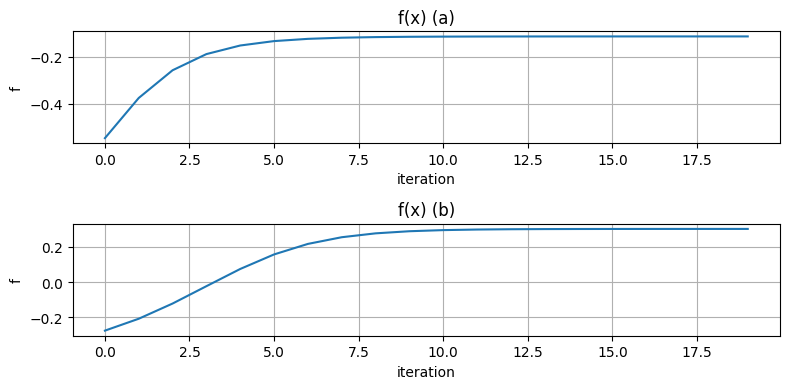

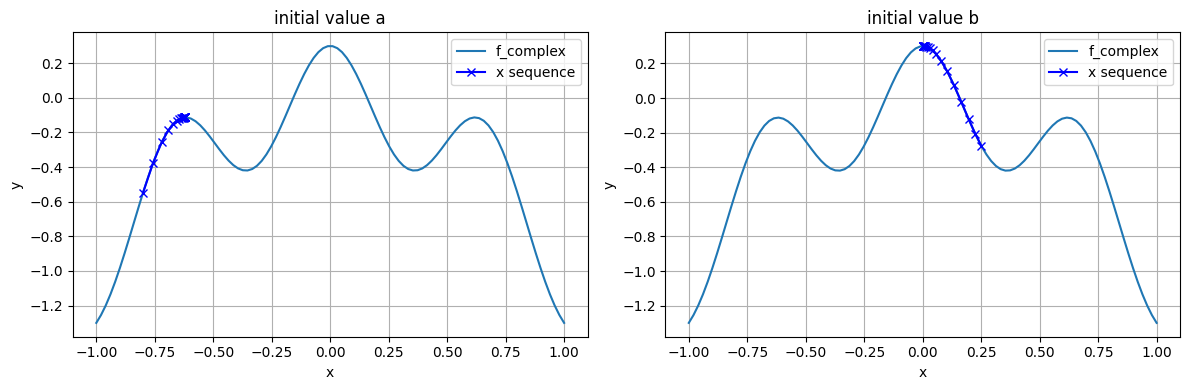

In [79]:
# 目的関数の定義
f_complex(x) = 0.3 * cos(3pi * x) - x^2

# 最適化のパラメータ設定
maxiter = 20
η = 0.01

# 初期化a
x_init_a = -0.8
x_seq_a = gradient_method_1dim(f_complex, x_init_a, η, maxiter)
f_seq_a = f_complex.(x_seq_a)

# 初期化b
x_init_b = 0.25
x_seq_b = gradient_method_1dim(f_complex, x_init_b, η, maxiter)
f_seq_b = f_complex.(x_seq_b)

# 目的関数の値をステップごとにプロット
fig, axes = subplots(2, 1, figsize=(8, 4))
axes[1].plot(f_seq_a)
axes[1].set_xlabel("iteration"), axes[1].set_ylabel("f")
axes[1].set_title("f(x) (a)")
axes[1].grid()
axes[2].plot(f_seq_b)
axes[2].set_xlabel("iteration"), axes[2].set_ylabel("f")
axes[2].set_title("f(x) (b)")
axes[2].grid()
tight_layout()

# 関数を可視化する範囲
xs = range(-1, 1, length=100)

# 最適化の過程
fig, axes = subplots(1, 2, figsize=(12, 4))
axes[1].plot(xs, f_complex.(xs), label="f_complex")
axes[1].plot(x_seq_a, f_complex.(x_seq_a), color="b", marker="x", label="x sequence")
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].grid()
axes[1].set_title("initial value a")
axes[1].legend()

axes[2].plot(xs, f_complex.(xs), label="f_complex")
axes[2].plot(x_seq_b, f_complex.(x_seq_b), color="b", marker="x", label="x sequence")
axes[2].set_xlabel("x"), axes[2].set_ylabel("y")
axes[2].grid()
axes[2].set_title("initial value b")
axes[2].legend()

tight_layout()

## 最適化によるカーブフィッティング

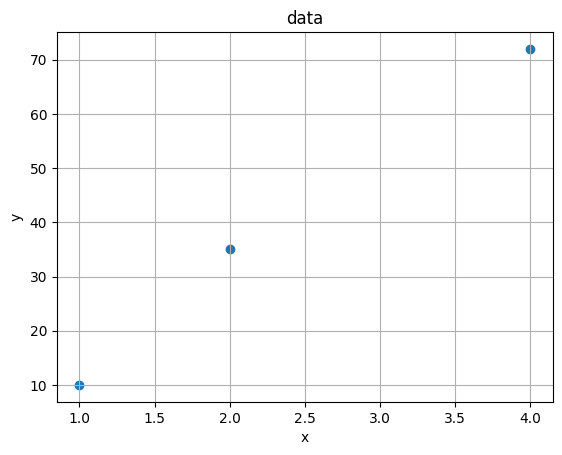

In [80]:
# 学習用の入力値集合
X_obs = [1, 2, 4]

# 学習用の出力値集合
Y_obs = [10, 35, 72]

# データの可視化
fig, ax = subplots()
ax.scatter(X_obs, Y_obs)
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.set_title("data")
ax.grid()

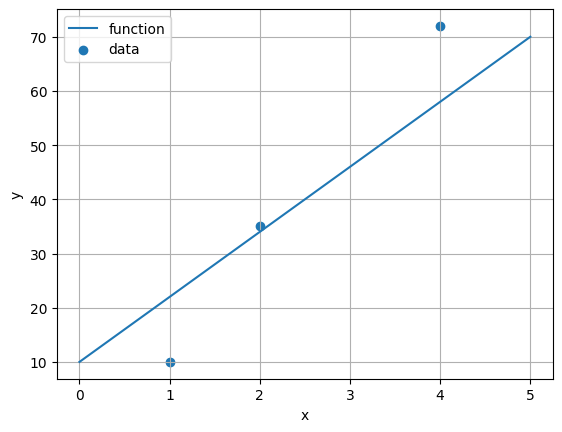

PyObject <matplotlib.legend.Legend object at 0xffff5385ee80>

In [81]:
# 適当な傾きパラメータおよび切片パラメータを設定
w = [12.0, 10.0]

# 予測に使う関数
f(x) = w[1]*x + w[2]

# 関数を可視化する範囲
xs = range(0, 5, length=100)

# データと予測関数の可視化
fig, ax = subplots()
ax.plot(xs, f.(xs), label="function")
ax.scatter(X_obs, Y_obs, label="data")
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.grid()
ax.legend()

In [82]:
# 誤差関数の定義
E(w) = sum([(Y_obs[n] - (w[1]*X_obs[n] + w[2]))^2 for n in 1:length(X_obs)])

E (generic function with 1 method)

In [85]:
# 最適化するパラメータの初期値
w_init = [0.0, 0.0]

# 最適化計算の回数
maxiter = 500

# 学習率
η = 0.01

# 最適化の実行．最大化アルゴリズムなので，-Eを目的関数にする
F(w) = -E(w)
w_seq = gradient_method(F, w_init, η, maxiter)
f_seq = [F(w_seq[:, i]) for i in 1:maxiter]

500-element Vector{Float64}:
 -6509.0
 -1939.5819999999997
  -644.3813987199998
  -275.7910161687038
  -169.46811483893487
  -137.41138630873562
  -126.41782512660872
  -121.4305759666068
  -118.18766202638302
  -115.48193910495918
  -112.97076516030776
  -110.556165388921
  -108.20942661889302
     ⋮
   -12.072442904302092
   -12.072418776699926
   -12.072395223013139
   -12.072372229590176
   -12.072349783104178
   -12.072327870545308
   -12.072306479213296
   -12.072285596709893
   -12.072265210931684
   -12.072245310063245
   -12.072225882570269
   -12.072206917192597

In [86]:
w₁, w₂ = w_seq[:, end]
println("w₁ = $(w₁), w₂ = $(w₂)")

w₁ = 20.345436819385633, w₂ = -8.465882327774901


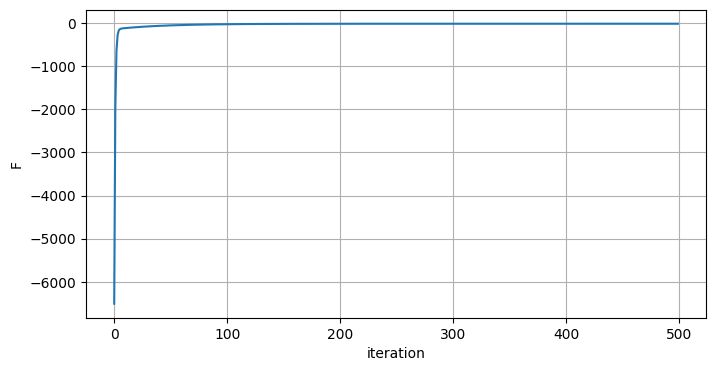

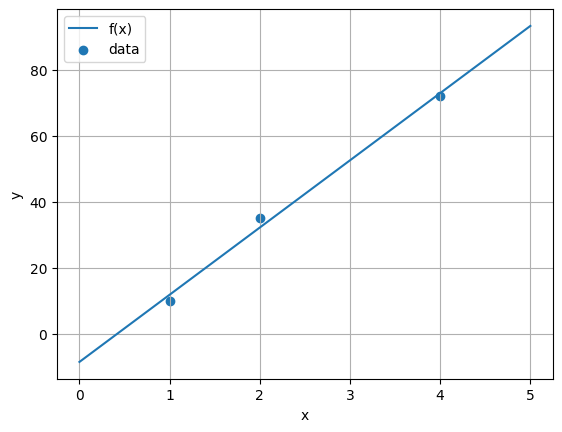

PyObject <matplotlib.legend.Legend object at 0xffff4cc850d0>

In [87]:
# 目的関数の値をステップごとにプロット
fig, ax = subplots(figsize=(8, 4))
ax.plot(f_seq)
ax.set_xlabel("iteration"), ax.set_ylabel("F")
ax.grid()

# 予測に使う１次関数
f(x) = w₁*x + w₂

# 関数を可視化する範囲
xs = range(0, 5, length=100)

# データと予測関数のプロット
fig, ax = subplots()
ax.plot(xs, f.(xs), label="f(x)")
ax.scatter(X_obs, Y_obs, label="data")
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.grid()
ax.legend()

In [88]:
function linear_fit(Y, X)
    N = length(Y)
    w₁ = sum((Y .- mean(Y)) .* X) / sum((X .- mean(X)) .* X)
    w₂ = mean(Y) - w₁*mean(X)
    w₁, w₂
end
w₁, w₂ = linear_fit(Y_obs, X_obs)
println("w₁ = $(w₁), w₂ = $(w₂)")

w₁ = 20.35714285714286, w₂ = -8.500000000000014


## 積分計算

### １変数関数の数値積分

In [89]:
function approx_integration(x_range, f)
    # 幅
    Δ = x_range[2] - x_range[1]
    
    # 近似された面積と幅を返す
    sum([f(x) * Δ for x in x_range]), Δ
end

approx_integration (generic function with 1 method)

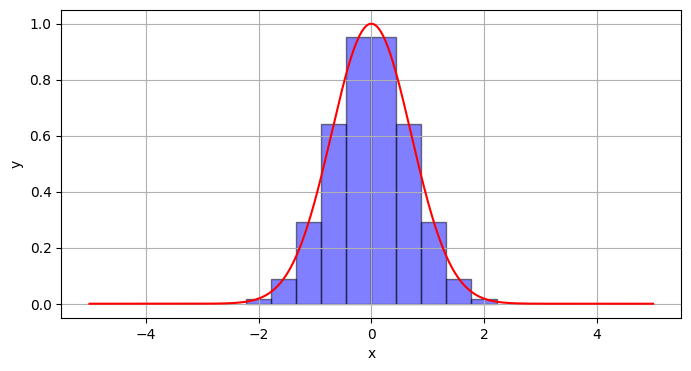

approx = 1.7699705304277666
exact = 1.7724538509055159


In [90]:
# 面積を近似したい関数
f(x) = exp(-x^2)

# 等間隔の配列を用意
x_range = range(-2, 2, length=10)

# 積分近似の実行
approx, Δ = approx_integration(x_range, f)

# 近似値(approx)と厳密値(exact)の比較
println("approx = $(approx)")
println("exact = $(sqrt(pi))")

# 関数と近似結果の可視化
fig, ax = subplots(figsize=(8, 4))
xs = range(-5, 5, length=1000)
ax.plot(xs, f.(xs), "r-")
for x in x_range
    ax.fill_between([x - Δ/2, x + Δ/2], [f(x), f(x)], [0, 0], facecolor="b", edgecolor="k", alpha=0.5)
end
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.grid()

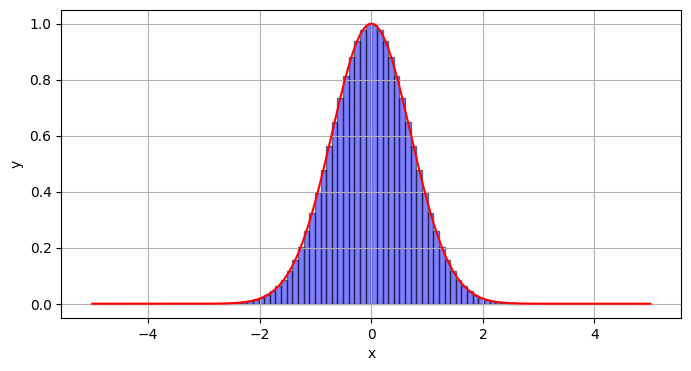

approx = 1.7724538509039647
exact = 1.7724538509055159


In [91]:
# 等間隔の配列を用意
x_range = range(-5, 5, length=100)

# 積分近似の実行
approx, Δ = approx_integration(x_range, f)

# 近似値(approx)と厳密値(exact)の比較
println("approx = $(approx)")
println("exact = $(sqrt(pi))")

# 関数と近似結果の可視化
fig, ax = subplots(figsize=(8, 4))
xs = range(-5, 5, length=1000)
ax.plot(xs, f.(xs), "r-")
for x in x_range
    ax.fill_between([x - Δ/2, x + Δ/2], [f(x), f(x)], [0, 0], facecolor="b", edgecolor="k", alpha=0.5)
end
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.grid()

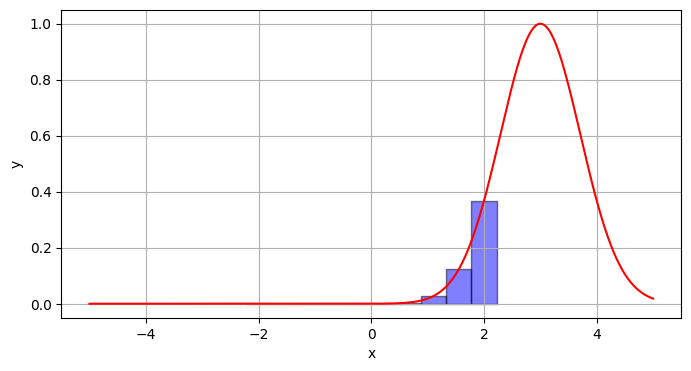

approx = 0.233343789106035
exact = 1.7724538509055159


In [92]:
# 面積を近似したい関数
f(x) = exp(-(x - 3)^2)

# 等間隔の配列を用意
x_range = range(-2, 2, length=10)

# 積分近似の実行
approx, Δ = approx_integration(x_range, f)

# 近似値(approx)と厳密値(exact)の比較
println("approx = $(approx)")
println("exact = $(sqrt(pi))")

# 関数と近似結果の可視化
fig, ax = subplots(figsize=(8, 4))
xs = range(-5, 5, length=1000)
ax.plot(xs, f.(xs), "r-")
for x in x_range
    ax.fill_between([x - Δ/2, x + Δ/2], [f(x), f(x)], [0, 0], facecolor="b", edgecolor="k", alpha=0.5)
end
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.grid()

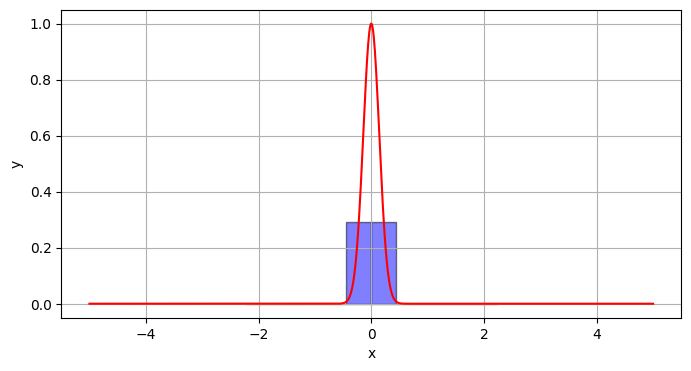

approx = 0.2586448037358885
exact = 0.3544907701811032


In [94]:
# 面積を近似したい関数
f(x) = exp(-(x/0.2)^2)

# 等間隔の配列を用意
x_range = range(-2, 2, length=10)

# 積分近似の実行
approx, Δ = approx_integration(x_range, f)

# 近似値(approx)と厳密値(exact)の比較
println("approx = $(approx)")
println("exact = $(0.2sqrt(pi))")

# 関数と近似結果の可視化
fig, ax = subplots(figsize=(8, 4))
xs = range(-5, 5, length=1000)
ax.plot(xs, f.(xs), "r-")
for x in x_range
    ax.fill_between([x - Δ/2, x + Δ/2], [f(x), f(x)], [0, 0], facecolor="b", edgecolor="k", alpha=0.5)
end
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.grid()

### 多変数関数の数値積分

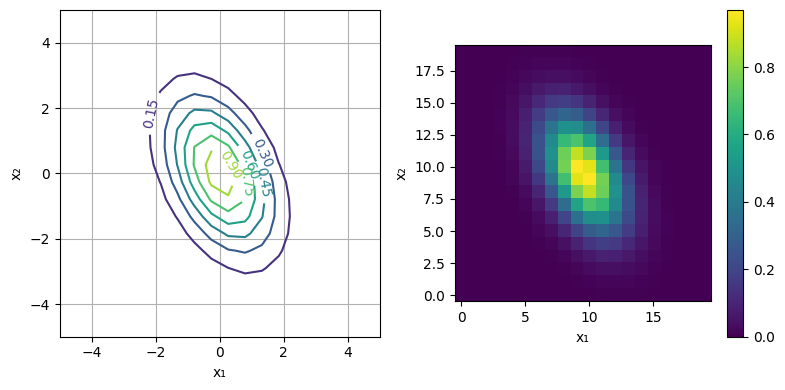

In [96]:
# 積分対象の２変数関数
D = 2
A = [0.5 0.3
     0.3 1.0]
f₂(x) = exp(-0.5*x'*A*x)

# 20x20の区画に分割
L = 20
xs₁ = range(-5, 5, length=L)
xs₂ = range(-5, 5, length=L)

fig, axes = subplots(1, 2, figsize=(8, 4))

# 等高線図で可視化
cs = axes[1].contour(repeat(xs₁, 1, L), repeat(xs₂', L, 1), [f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')
axes[1].clabel(cs)
axes[1].grid()
axes[1].set_xlabel("x₁"), axes[1].set_ylabel("x₂")

# カラー表示
cs = axes[2].imshow([f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂], origin="lower")
fig.colorbar(cs)
axes[2].set_xlabel("x₁"), axes[2].set_ylabel("x₂")

tight_layout()

In [106]:
function approx_integration_2dim(x_range, f)
    Δ = x_range[2] - x_range[1]
    sum([f([x₁, x₂]) * Δ^2 for x₁ in x_range, x₂ in x_range]), Δ
end

approx_integration_2dim (generic function with 1 method)

In [107]:
# det関数を使うためにLinearAlgebraパッケージを利用
using LinearAlgebra

# 20x20の区画に分割
L = 20
x_range = range(-5, 5, length=L)
approx, Δ = approx_integration_2dim(x_range, f₂)

println("approx = $(approx)")
println("exact = $(sqrt((2pi)^D/det(A)))")

approx = 9.805714174433021
exact = 9.812686860654528


In [108]:
# 1000x1000の区画に分割
L = 1000
x_range = range(-100, 100, length=L)
approx, Δ = approx_integration_2dim(x_range, f₂)

println("approx = $(approx)")
println("exact = $(sqrt((2pi)^D/det(A)))")

approx = 9.812686860654521
exact = 9.812686860654528
